# IMPORT LIBARY

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [6]:
# Load data
df = pd.read_csv('/content/drive/My Drive/DATA SCIENCE/healthcare_dataset.csv')
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


# Pembersihan dan Persiapan Data

In [7]:
# Mengubah kolom tanggal menjadi tipe data datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Membuat fitur baru 'Length of Stay' (Lama Rawat Inap) dalam hari
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Memeriksa kembali tipe data setelah perubahan
print("Informasi Dataset Setelah Perubahan Tipe Data dan Penambahan Fitur:")
df.info()

# Menampilkan 5 baris pertama untuk melihat kolom baru
print("\nDataset dengan kolom 'Length of Stay':")
print(df[['Date of Admission', 'Discharge Date', 'Length of Stay']].head())

Informasi Dataset Setelah Perubahan Tipe Data dan Penambahan Fitur:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null 

# Analisis Data Eksploratif (EDA) dengan Visualisasi

Distribusi Usia dan Gender Pasien

/tmp/ipython-input-8-325965607.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


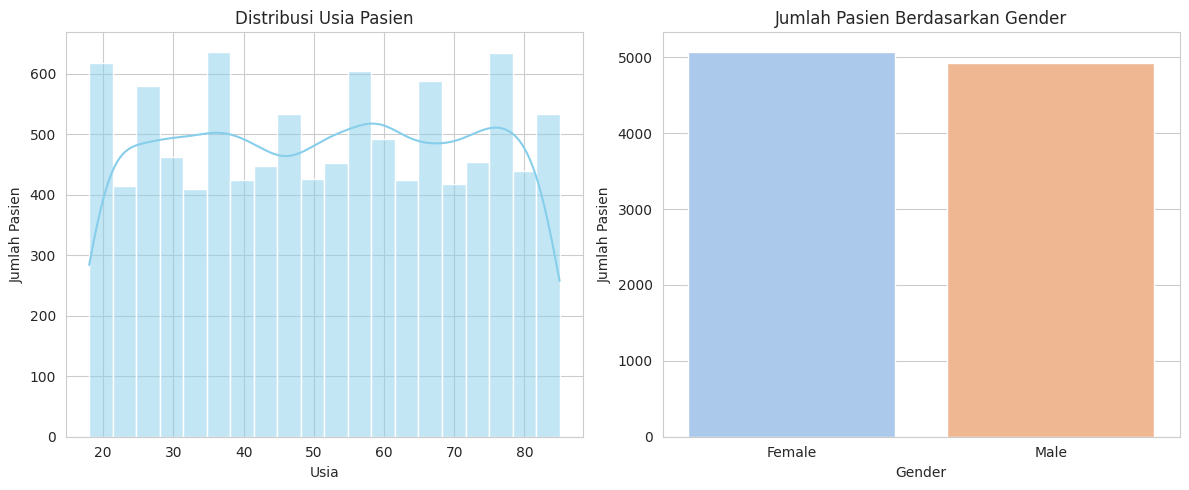

In [8]:
# Mengatur gaya visualisasi
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

# Grafik 1: Histogram untuk distribusi usia
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pasien')

# Grafik 2: Diagram batang untuk gender
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Jumlah Pasien Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Pasien')

plt.tight_layout()
plt.show()

Kondisi Medis dan Tipe Pendaftaran

/tmp/ipython-input-9-886616772.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_conditions.values, y=top_10_conditions.index, palette='viridis')
/tmp/ipython-input-9-886616772.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Admission Type', data=df, palette='magma')


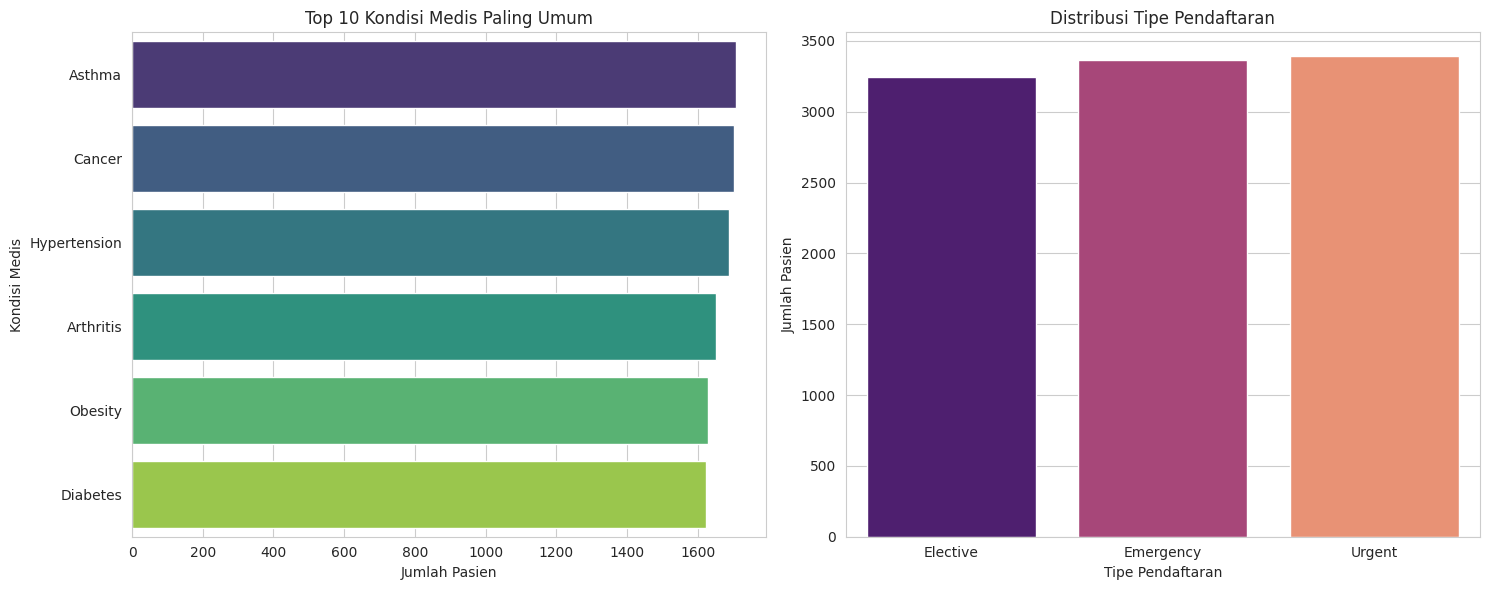

In [9]:
plt.figure(figsize=(15, 6))

# Grafik 1: 10 Kondisi Medis Paling Umum
plt.subplot(1, 2, 1)
# Menghitung 10 kondisi medis teratas
top_10_conditions = df['Medical Condition'].value_counts().nlargest(10)
sns.barplot(x=top_10_conditions.values, y=top_10_conditions.index, palette='viridis')
plt.title('Top 10 Kondisi Medis Paling Umum')
plt.xlabel('Jumlah Pasien')
plt.ylabel('Kondisi Medis')

# Grafik 2: Distribusi Tipe Pendaftaran
plt.subplot(1, 2, 2)
sns.countplot(x='Admission Type', data=df, palette='magma')
plt.title('Distribusi Tipe Pendaftaran')
plt.xlabel('Tipe Pendaftaran')
plt.ylabel('Jumlah Pasien')

plt.tight_layout()
plt.show()

Analisis Biaya dan Lama Rawat Inap

/tmp/ipython-input-10-3164303553.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Admission Type', y='Billing Amount', data=df, palette='plasma')


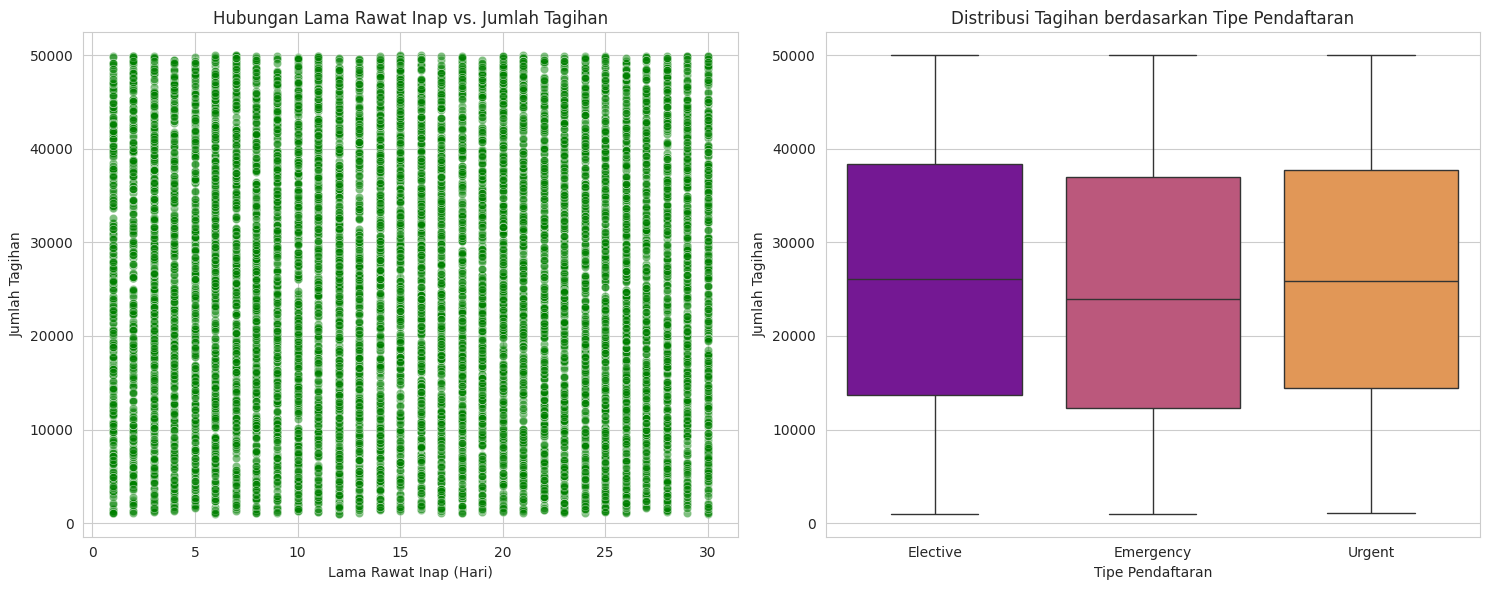

In [10]:
plt.figure(figsize=(15, 6))

# Grafik 1: Hubungan antara Lama Rawat dan Jumlah Tagihan
plt.subplot(1, 2, 1)
sns.scatterplot(x='Length of Stay', y='Billing Amount', data=df, alpha=0.5, color='green')
plt.title('Hubungan Lama Rawat Inap vs. Jumlah Tagihan')
plt.xlabel('Lama Rawat Inap (Hari)')
plt.ylabel('Jumlah Tagihan')

# Grafik 2: Distribusi Jumlah Tagihan berdasarkan Tipe Pendaftaran
plt.subplot(1, 2, 2)
sns.boxplot(x='Admission Type', y='Billing Amount', data=df, palette='plasma')
plt.title('Distribusi Tagihan berdasarkan Tipe Pendaftaran')
plt.xlabel('Tipe Pendaftaran')
plt.ylabel('Jumlah Tagihan')

plt.tight_layout()
plt.show()

# Persiapan Data untuk Model (Preprocessing)

In [11]:
from sklearn.compose import ColumnTransformer

# 1. Memilih Fitur (X) dan Target (y)
features = df.drop(columns=['Name', 'Date of Admission', 'Discharge Date', 'Billing Amount', 'Room Number', 'Doctor', 'Hospital'])
target = df['Billing Amount']

# 2. Membagi data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 3. Transformasi Data
categorical_features = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']
numerical_features = ['Age', 'Length of Stay']

# Membuat preprocessor dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Terapkan preprocessor ke data latih dan data uji
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Data berhasil diproses dan siap untuk modeling.")
print("Bentuk data latih (X_train_processed):", X_train_processed.shape)
print("Bentuk data uji (X_test_processed):", X_test_processed.shape)

Data berhasil diproses dan siap untuk modeling.
Bentuk data latih (X_train_processed): (8000, 34)
Bentuk data uji (X_test_processed): (2000, 34)


# Melatih dan Mengevaluasi Model

In [12]:
# Membuat fungsi untuk mengevaluasi model agar tidak menulis kode berulang
def evaluate_model(model_name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"Hasil Evaluasi untuk {model_name}:")
    print(f"  R-squared (R²): {r2:.3f}")
    print(f"  Mean Absolute Error (MAE): ${mae:,.2f}")
    print(f"  Root Mean Squared Error (RMSE): ${rmse:,.2f}")
    print("-" * 30)

# --- 1. Model Linear Regression (Baseline) ---
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)
y_pred_lr = lr_model.predict(X_test_processed)
evaluate_model("Linear Regression", y_test, y_pred_lr)

# --- 2. Model Random Forest Regressor ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_processed, y_train)
y_pred_rf = rf_model.predict(X_test_processed)
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)

Hasil Evaluasi untuk Linear Regression:
  R-squared (R²): 0.001
  Mean Absolute Error (MAE): $12,236.93
  Root Mean Squared Error (RMSE): $14,130.34
------------------------------
Hasil Evaluasi untuk Random Forest Regressor:
  R-squared (R²): -0.048
  Mean Absolute Error (MAE): $12,419.96
  Root Mean Squared Error (RMSE): $14,476.46
------------------------------


# Interpretasi Model

Top 10 Fitur Paling Penting:
                                Feature  Importance
0                                   Age    0.223537
1                        Length of Stay    0.168839
20             Insurance Provider_Cigna    0.022417
32            Test Results_Inconclusive    0.021492
33                  Test Results_Normal    0.021425
13             Medical Condition_Asthma    0.021360
31                Test Results_Abnormal    0.021074
19        Insurance Provider_Blue Cross    0.020566
16       Medical Condition_Hypertension    0.020294
22  Insurance Provider_UnitedHealthcare    0.020240


/tmp/ipython-input-13-330607583.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='rocket')


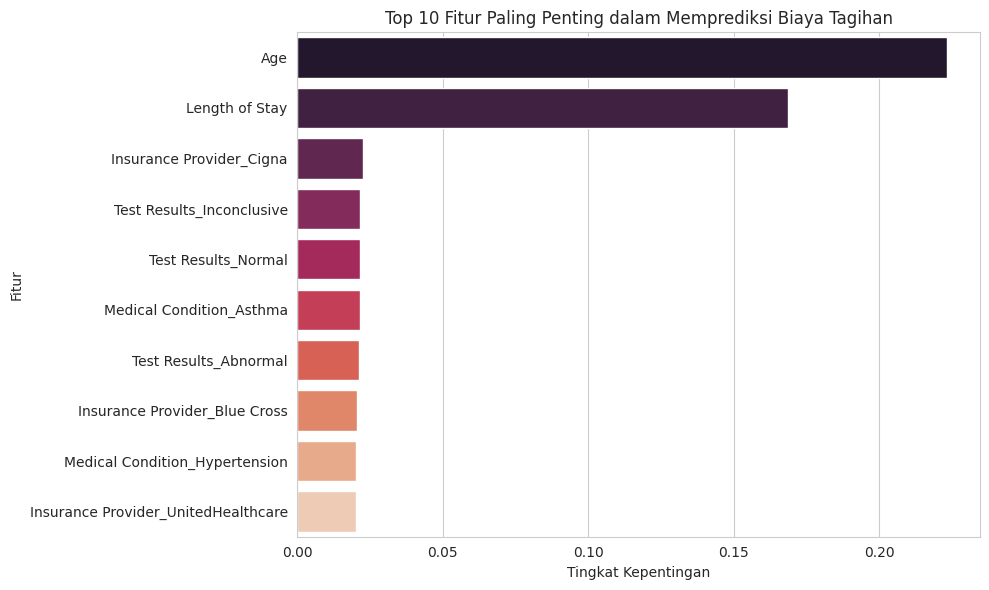

In [13]:
# Mendapatkan nama fitur setelah one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
# Menggabungkan nama fitur numerik dan kategorikal
final_feature_names = np.concatenate([numerical_features, ohe_feature_names])

# Membuat DataFrame dari fitur dan tingkat kepentingannya
importance_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Menampilkan 10 fitur terpenting
print("Top 10 Fitur Paling Penting:")
print(importance_df.head(10))

# Visualisasi 10 Fitur Terpenting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='rocket')
plt.title('Top 10 Fitur Paling Penting dalam Memprediksi Biaya Tagihan')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()